# Training and testing
We will now fit and evaluate various models, such as Multinomial Naive Bayes and Multinomial Logistic Regression.

In [44]:
# import libraries
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt   

First, we will create training x,y and testing x,y variables to pass into model based on the .csv data file

In [45]:
train_data = 'data/tfidf_train_data.csv'
test_data = 'data/tfidf_test_data.csv'

df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

In [46]:
y_train, x_train = df_train.iloc[:, 0], df_train.iloc[:, 1:]
y_test, x_test = df_test.iloc[:, 0], df_test.iloc[:, 1:]
mbti_types = list(set(y_train))

print(x_train.head())
print(x_test.head())

   abandon  abandoned   ability      able  abortion  abroad  absence  absent  \
0      0.0        0.0  0.000000  0.000000       0.0     0.0      0.0     0.0   
1      0.0        0.0  0.040389  0.000000       0.0     0.0      0.0     0.0   
2      0.0        0.0  0.000000  0.000000       0.0     0.0      0.0     0.0   
3      0.0        0.0  0.000000  0.000000       0.0     0.0      0.0     0.0   
4      0.0        0.0  0.000000  0.027295       0.0     0.0      0.0     0.0   

   absolute  absolutely  ...  youre  youth  youtube   yr       yup    z  zero  \
0       0.0         0.0  ...    0.0    0.0      0.0  0.0  0.000000  0.0   0.0   
1       0.0         0.0  ...    0.0    0.0      0.0  0.0  0.000000  0.0   0.0   
2       0.0         0.0  ...    0.0    0.0      0.0  0.0  0.000000  0.0   0.0   
3       0.0         0.0  ...    0.0    0.0      0.0  0.0  0.040218  0.0   0.0   
4       0.0         0.0  ...    0.0    0.0      0.0  0.0  0.000000  0.0   0.0   

   zodiac    zombie  zone  
0   

## Multinomial Naive Bayes 
to do: add confusion matrix, precision recall, f1 score more like f u naive bayes u suck!!!!

In [47]:
nb_model = MultinomialNB().fit(x_train, y_train)
nb_y = nb_model.predict(x_test)
nb_acc = accuracy_score(nb_y, y_test)
print("Multinomial Naive Bayes Accuracy:", nb_acc)

Multinomial Naive Bayes Accuracy: 0.3642651296829971


/Users/jmc/opt/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['ISTP', 'INTP', 'ESTJ', 'ESFJ', 'ENFP', 'INTJ', 'ESTP', 'ENTJ', 'ENTP', 'ENFJ', 'ISFP', 'ISFJ', 'ESFP', 'ISTJ', 'INFP', 'INFJ'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


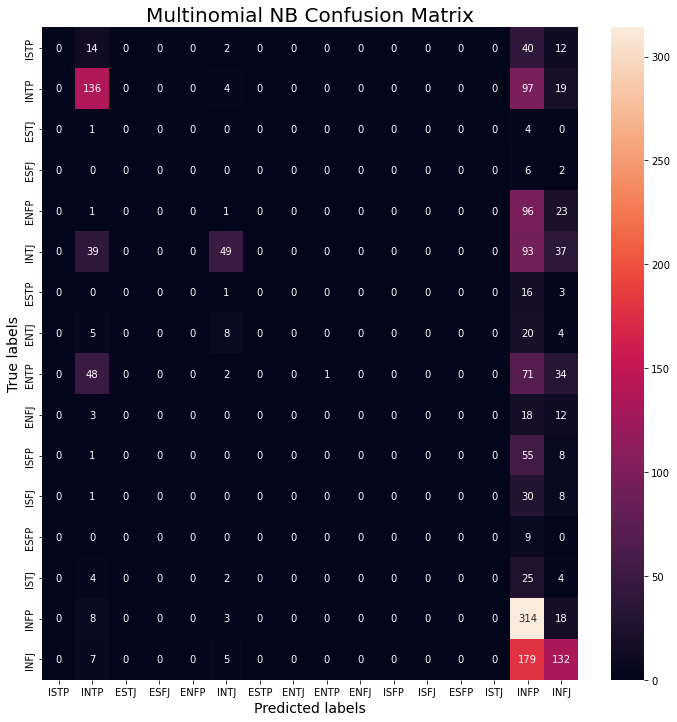

In [48]:
# confusion matrix
nb_conf = confusion_matrix(y_test, nb_y, mbti_types)

plt.figure(figsize=(12,12))
ax=plt.subplot()
sns.heatmap(nb_conf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('Multinomial NB Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(mbti_types, fontsize=10)
ax.yaxis.set_ticklabels(mbti_types, fontsize=10)

plt.savefig('figures/NB_confmat.jpg')

In [49]:
# Precision recall
metrics = classification_report(y_test, nb_y)
print(metrics)

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        33
        ENFP       0.00      0.00      0.00       121
        ENTJ       0.00      0.00      0.00        37
        ENTP       1.00      0.01      0.01       156
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00         5
        ESTP       0.00      0.00      0.00        20
        INFJ       0.42      0.41      0.41       323
        INFP       0.29      0.92      0.44       343
        INTJ       0.64      0.22      0.33       218
        INTP       0.51      0.53      0.52       256
        ISFJ       0.00      0.00      0.00        39
        ISFP       0.00      0.00      0.00        64
        ISTJ       0.00      0.00      0.00        35
        ISTP       0.00      0.00      0.00        68

    accuracy                           0.36      1735
   macro avg       0.18   

/Users/jmc/opt/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Multinomial Logistic Regression

In [50]:
logreg_model = LogisticRegression(multi_class='ovr', max_iter=1000).fit(x_train, y_train)
logreg_y = logreg_model.predict(x_test)
logreg_acc = accuracy_score(logreg_y, y_test)
print("Logistic Regression Accuracy:", logreg_acc)

Logistic Regression Accuracy: 0.6438040345821325


/Users/jmc/opt/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['ISTP', 'INTP', 'ESTJ', 'ESFJ', 'ENFP', 'INTJ', 'ESTP', 'ENTJ', 'ENTP', 'ENFJ', 'ISFP', 'ISFJ', 'ESFP', 'ISTJ', 'INFP', 'INFJ'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


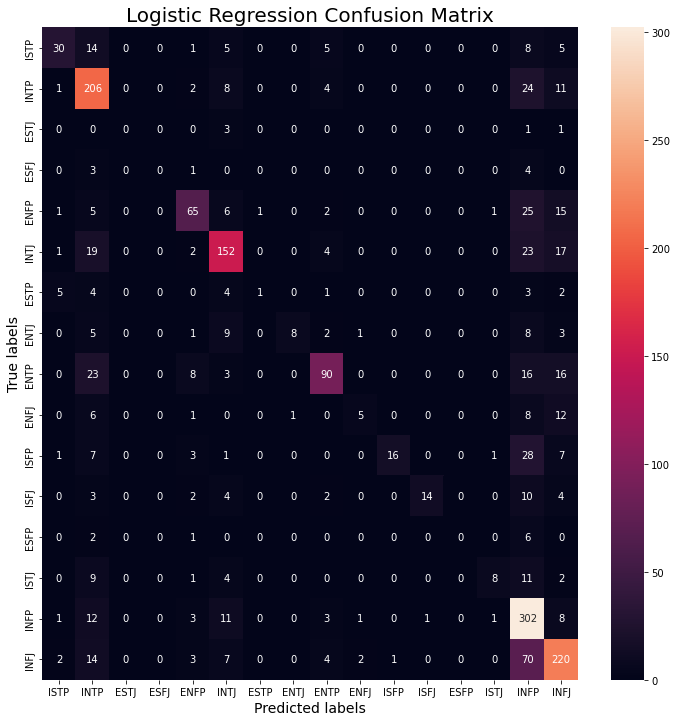

In [51]:
# confusion matrix
logreg_conf = confusion_matrix(y_test, logreg_y, mbti_types)

plt.figure(figsize=(12,12))
ax=plt.subplot()
sns.heatmap(logreg_conf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('Logistic Regression Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(mbti_types, fontsize=10)
ax.yaxis.set_ticklabels(mbti_types, fontsize=10)

plt.savefig('figures/logreg_confmat.jpg')

In [52]:
# Precision recall
metrics = classification_report(y_test, logreg_y)
print(metrics)

              precision    recall  f1-score   support

        ENFJ       0.56      0.15      0.24        33
        ENFP       0.69      0.54      0.60       121
        ENTJ       0.89      0.22      0.35        37
        ENTP       0.77      0.58      0.66       156
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00         5
        ESTP       0.50      0.05      0.09        20
        INFJ       0.68      0.68      0.68       323
        INFP       0.55      0.88      0.68       343
        INTJ       0.70      0.70      0.70       218
        INTP       0.62      0.80      0.70       256
        ISFJ       0.93      0.36      0.52        39
        ISFP       0.94      0.25      0.40        64
        ISTJ       0.73      0.23      0.35        35
        ISTP       0.71      0.44      0.55        68

    accuracy                           0.64      1735
   macro avg       0.58   

/Users/jmc/opt/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Linear Support Vector Classification

In [53]:
svc_model = LinearSVC().fit(x_train, y_train)
svc_y = svc_model.predict(x_test)
svc_acc = accuracy_score(y_test, svc_y)
print("Linear SVC Accuracy:", svc_acc)

Linear SVC Accuracy: 0.6340057636887608


[[ 42   5   0   0   1   5   2   1   4   0   0   0   0   0   4   4]
 [  4 184   0   0   5  14   0   1  10   1   0   0   0   0  22  15]
 [  0   1   1   0   0   2   0   0   0   0   0   0   0   0   0   1]
 [  0   1   0   3   1   0   0   0   0   1   0   0   0   0   2   0]
 [  1   5   0   0  73   9   1   0   3   1   0   1   1   1  15  10]
 [  2  19   0   0   7 138   0   3   7   1   0   1   0   1  18  21]
 [  2   4   0   0   1   0   5   1   2   0   0   0   0   0   3   2]
 [  0   5   0   0   1   6   0  14   2   1   1   0   0   0   5   2]
 [  1  22   0   0  11   6   0   3  87   0   2   1   0   0   7  16]
 [  1   4   0   0   2   2   0   1   1  12   0   0   0   0   5   5]
 [  1   3   0   0   2   1   0   0   1   0  28   1   0   1  19   7]
 [  0   3   0   0   2   1   0   0   1   0   1  21   0   0   8   2]
 [  0   0   0   0   3   0   0   0   0   1   0   0   1   0   4   0]
 [  0   6   0   0   1   3   0   0   2   0   1   1   0  17   3   1]
 [  1  18   0   1   6  17   0   0   5   2   1   1   0   1 263 

/Users/jmc/opt/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['ISTP', 'INTP', 'ESTJ', 'ESFJ', 'ENFP', 'INTJ', 'ESTP', 'ENTJ', 'ENTP', 'ENFJ', 'ISFP', 'ISFJ', 'ESFP', 'ISTJ', 'INFP', 'INFJ'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


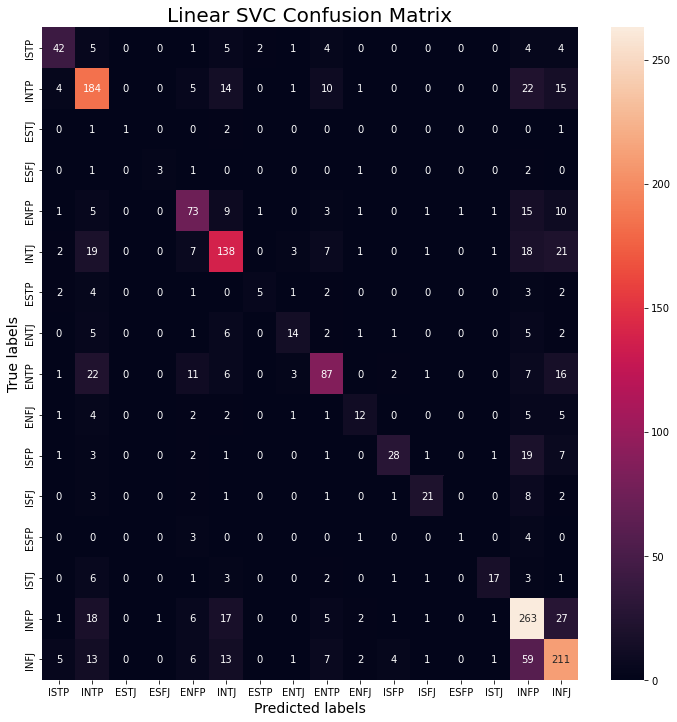

In [54]:
# confusion matrix
svc_conf = confusion_matrix(y_test, svc_y, mbti_types)
print(svc_conf)

plt.figure(figsize=(12,12))
ax=plt.subplot()
sns.heatmap(svc_conf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('Linear SVC Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(mbti_types, fontsize=10)
ax.yaxis.set_ticklabels(mbti_types, fontsize=10)

plt.savefig('figures/svc_confmat.jpg')

In [55]:
# Precision recall
metrics = classification_report(y_test, svc_y)
print(metrics)

              precision    recall  f1-score   support

        ENFJ       0.55      0.36      0.44        33
        ENFP       0.60      0.60      0.60       121
        ENTJ       0.56      0.38      0.45        37
        ENTP       0.66      0.56      0.60       156
        ESFJ       0.75      0.38      0.50         8
        ESFP       0.50      0.11      0.18         9
        ESTJ       1.00      0.20      0.33         5
        ESTP       0.62      0.25      0.36        20
        INFJ       0.65      0.65      0.65       323
        INFP       0.60      0.77      0.67       343
        INTJ       0.64      0.63      0.63       218
        INTP       0.63      0.72      0.67       256
        ISFJ       0.75      0.54      0.63        39
        ISFP       0.74      0.44      0.55        64
        ISTJ       0.77      0.49      0.60        35
        ISTP       0.70      0.62      0.66        68

    accuracy                           0.63      1735
   macro avg       0.67   